In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from expand import expand

In [2]:
temp = pd.read_csv("/home/jorge/Proyectos/datas/titanic/tables/data_cleaned/train.csv")
train = expand(temp)

del temp

In [5]:
train

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Letter,Number,Many,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",False,22.0,1,0,A/5 21171,7.2500,NaN,NaN,NaN,False,S,False
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",True,38.0,1,0,PC 17599,71.2833,C85,C,85.0,False,C,True
2,3,3,"Heikkinen, Miss. Laina",True,26.0,0,0,STON/O2. 3101282,7.9250,NaN,NaN,NaN,False,S,True
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",True,35.0,1,0,113803,53.1000,C123,C,123.0,False,S,True
4,5,3,"Allen, Mr. William Henry",False,35.0,0,0,373450,8.0500,NaN,NaN,NaN,False,S,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",False,27.0,0,0,211536,13.0000,NaN,NaN,NaN,False,S,False
887,888,1,"Graham, Miss. Margaret Edith",True,19.0,0,0,112053,30.0000,B42,B,42.0,False,S,True
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",True,NaN,1,2,W./C. 6607,23.4500,NaN,NaN,NaN,False,S,False
889,890,1,"Behr, Mr. Karl Howell",False,26.0,0,0,111369,30.0000,C148,C,148.0,False,C,True


In [6]:
train.corr()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Number,Many,Survived
PassengerId,1.000000,-0.035144,-0.042939,0.036847,-0.057527,-0.001652,0.012658,0.039958,-0.001941,-0.005007
Pclass,-0.035144,1.000000,-0.131900,-0.369226,0.083081,0.018443,-0.549500,-0.086892,-0.194195,-0.338481
Sex,-0.042939,-0.131900,1.000000,-0.093254,0.114631,0.245489,0.182333,-0.048713,0.036889,0.543351
Age,0.036847,-0.369226,-0.093254,1.000000,-0.308247,-0.189119,0.096067,0.072952,-0.039977,-0.077221
SibSp,-0.057527,0.083081,0.114631,-0.308247,1.000000,0.414838,0.159651,-0.061207,0.065717,-0.035322
Parch,-0.001652,0.018443,0.245489,-0.189119,0.414838,1.000000,0.216225,-0.115442,0.205164,0.081629
Fare,0.012658,-0.549500,0.182333,0.096067,0.159651,0.216225,1.000000,0.062864,0.441953,0.257307
Number,0.039958,-0.086892,-0.048713,0.072952,-0.061207,-0.115442,0.062864,1.000000,0.012306,-0.054869
Many,-0.001941,-0.194195,0.036889,-0.039977,0.065717,0.205164,0.441953,0.012306,1.000000,0.068251
Survived,-0.005007,-0.338481,0.543351,-0.077221,-0.035322,0.081629,0.257307,-0.054869,0.068251,1.000000


In [12]:
train.corr()["Survived"]

PassengerId   -0.005007
Pclass        -0.338481
Sex            0.543351
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Number        -0.054869
Many           0.068251
Survived       1.000000
Name: Survived, dtype: float64

## Letter

In [45]:
Cond=train[(train["Survived"] == True)][["Survived", "Letter"]].groupby("Letter").count()
Cond["Total"] = train[["Survived", "Letter"]].groupby("Letter").count()
Cond["No_Survived"] =  Cond["Total"] - Cond["Survived"]
Cond["P"] = Cond["Survived"]/Cond["Total"]

In [46]:
Cond

,Survived,Total,No_Survived,P
Letter,,,,
A,7,15,8,0.466667
B,35,47,12,0.744681
C,35,59,24,0.593220
D,25,33,8,0.757576
E,24,32,8,0.750000
F,8,13,5,0.615385
G,2,4,2,0.500000
T,0,1,1,0.000000


<AxesSubplot:xlabel='Letter'>

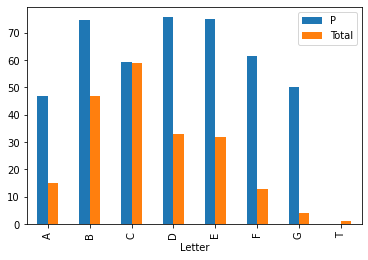

In [35]:
Cond[["P", "Total"]].plot(kind="bar")

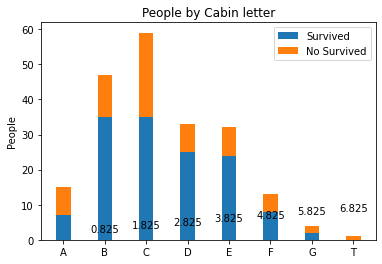

In [56]:

labels = Cond.index.tolist()
s = Cond["Survived"].values
ns = Cond["No_Survived"].values

width = 0.35       

fig, ax = plt.subplots()

rect1 = ax.bar(labels, s, width, label='Survived')
ax.bar(labels, ns, width, label='No Survived', bottom = s)

ax.set_ylabel('People')
ax.set_title('People by Cabin letter')
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_x()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rect1)    
        

plt.show()